<a href="https://colab.research.google.com/github/ObiDaniel/ObiDaniel/blob/main/Medical_Cost_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Information

Medical Cost Personal Datasets
Insurance Forecast

****

Can you accurately predict insurance costs?

 Source: Kaggle

#Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Import datasets

In [2]:
cost_df = pd.read_csv('insurance.csv')

In [3]:
cost_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#Statistical information
cost_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Let's see the data of highest charges
cost_df[cost_df['charges'] == 63770.428010]

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.41,0,yes,southeast,63770.42801


In [6]:
#From the above, you can see that the person with a lot of charges has high bmi and smokes.
#Clearly she's got health issues

In [7]:
#datatypes of the dataset attributes

cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#Data Preprocessing

In [8]:
#Check for null values

cost_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# check unique values in dataset

cost_df.apply(lambda x: len(x.unique()))

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
#Let's check for duplicates

cost_df.duplicated().sum()

1

In [11]:
cost_df.drop_duplicates(inplace=True)

In [12]:
cost_df.duplicated().sum()

0

#PERFORM SOME EXPLORATORY DATA ANALYSIS(EDA)

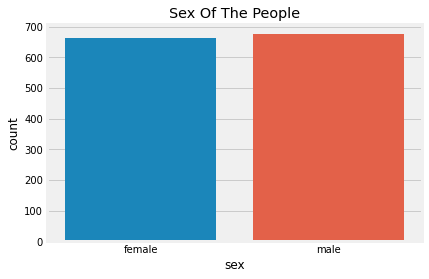

In [13]:
#Categorical attributes visualization

sns.countplot(cost_df['sex'])
plt.title('Sex Of The People')
plt.show()

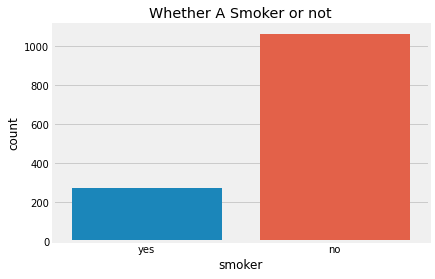

In [14]:
sns.countplot(cost_df['smoker'])
plt.title('Whether A Smoker or not')
plt.show()

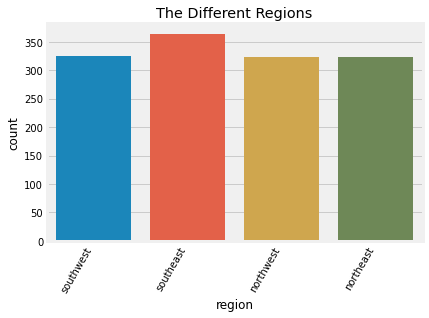

In [15]:
sns.countplot(cost_df['region']).set_xticklabels(sns.countplot(cost_df['region']).get_xticklabels(), rotation=60, ha="right")
plt.title('The Different Regions')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99bc16ced0>,
      dtype=object)

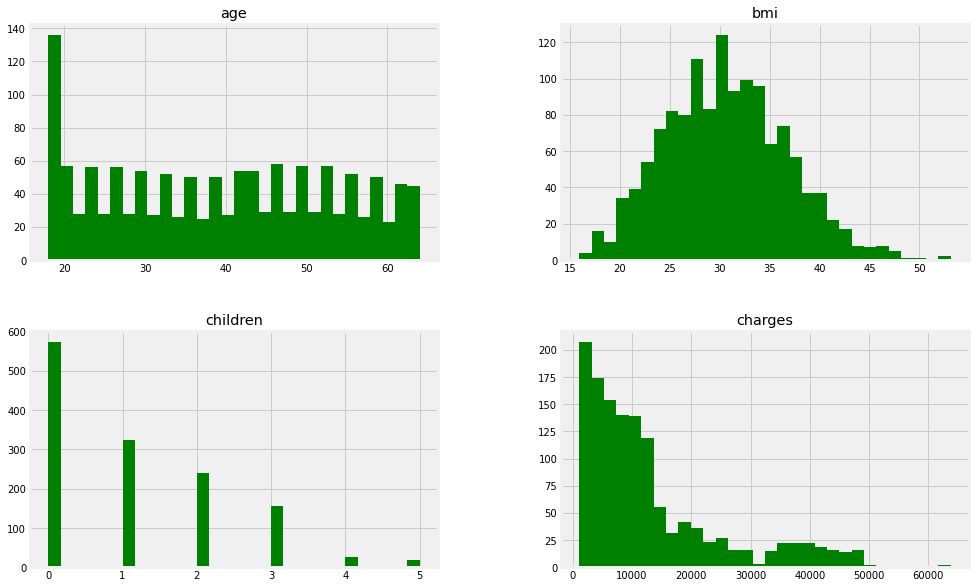

In [16]:
#we can use hist plot to visualize numerical atttributes also
cost_df.hist(bins = 30, figsize = (15,10), color = 'g')

#Encoding categorical data

In [17]:
#Label encoding

from sklearn.preprocessing import LabelEncoder
cols = ['sex','smoker','region']
le = LabelEncoder()
for col in cols:
    cost_df[col] = le.fit_transform(cost_df[col])

In [18]:
cost_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


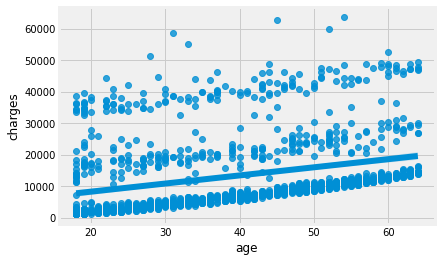

In [24]:
#Let's see factors that afeect medical chargesof the different people

sns.regplot(y=cost_df['charges'], x=cost_df['age'])#Older people pay just a bit more than younger folks

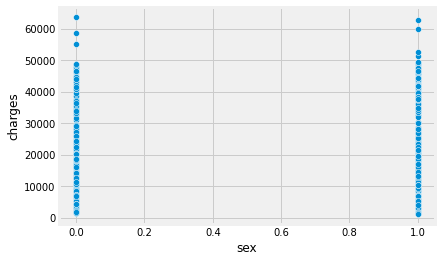

In [27]:
sns.scatterplot(y=cost_df['charges'], x=cost_df['sex'])#Gender plays no significant role in determimg charges

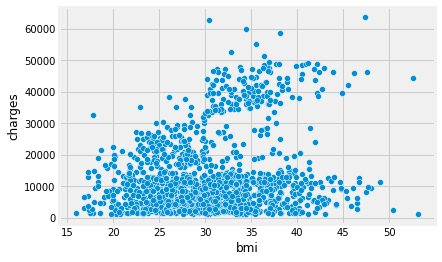

In [28]:
sns.scatterplot(y=cost_df['charges'], x=cost_df['bmi'])#Folks with higher bmi pays more charges

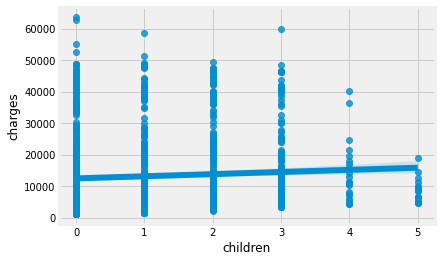

In [29]:
sns.regplot(y=cost_df['charges'], x=cost_df['children'])#People with no or less children pays higher charges

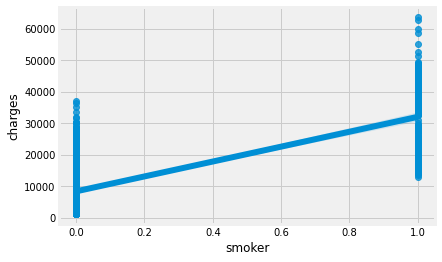

In [19]:
sns.regplot(y=cost_df['charges'], x=cost_df['smoker'])#Smokers pays more charges

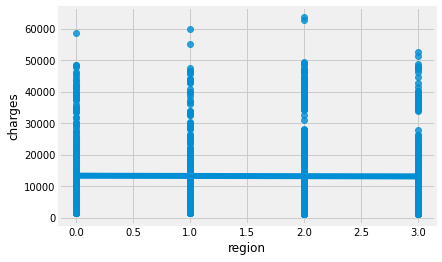

In [20]:
sns.regplot(y=cost_df['charges'], x=cost_df['region'])#Region plays no significant role in determimg charges

#Coorelation Matrix

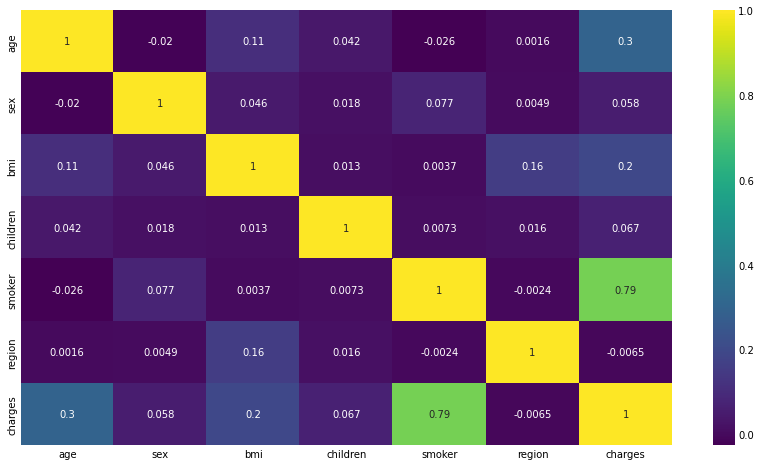

In [31]:
correlations =cost_df.corr()
f, ax = plt.subplots(figsize = (13, 8))
sns.heatmap(correlations, annot = True, cmap='viridis')

In [32]:
#Export cleaned dataset for future use

from google.colab import files
cost_df.to_csv('export_cost_df.csv') 
files.download('export_cost_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
#Input split

X = cost_df.drop(columns=['charges'], axis=1)
y = cost_df['charges']

In [34]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

#Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Training the Multiple Linear Regression model on the Training set

In [36]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
from sklearn.metrics import r2_score
y_pred=regressor.predict(X_test)
r2_score(y_test,y_pred)

0.8068466322629112

#ON RANDOM FOREST REGRESSION MODEL

In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [39]:
from sklearn.metrics import r2_score
y_pred=regressor.predict(X_test)
r2_score(y_test,y_pred)

0.8837620308250995

#Training the Decision Tree Regression model on the Training set

In [40]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
from sklearn.metrics import r2_score
y_pred=regressor.predict(X_test)
r2_score(y_test,y_pred)

0.7751278797673844

#Training the XGBoost model on the Training set

In [42]:
import xgboost as xgb
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

[11:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [43]:
from sklearn.metrics import r2_score
y_pred=regressor.predict(X_test)
r2_score(y_test,y_pred)

0.9045921804850199

Our best model is the XGBoost model/algorithm